<a href="https://colab.research.google.com/github/WALKWAY36/NN/blob/main/Preceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Почини меня!!!
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
                 names = ['длина чашелистника', 'ширина чашелистника', 'длина лепестка', 'ширина лепестка', 'вид ириса'])
df.tail(10)

,длина чашелистника,ширина чашелистника,длина лепестка,ширина лепестка,вид ириса
140,6.7,3.1,5.6,2.4,Iris-virginica
141,6.9,3.1,5.1,2.3,Iris-virginica
142,5.8,2.7,5.1,1.9,Iris-virginica
143,6.8,3.2,5.9,2.3,Iris-virginica
144,6.7,3.3,5.7,2.5,Iris-virginica
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


Iris-setosa
-1


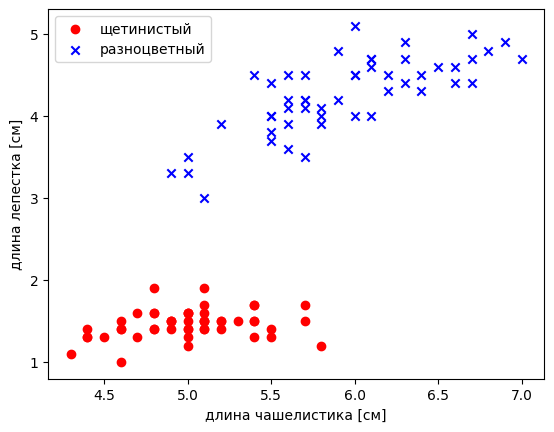

In [ ]:
# Если вы не исправили код выше, вы заметите это на графике
import matplotlib.pyplot as plt
import numpy as np
y = df.iloc[0:100, 4].values
print(y[0])
y = np.where(y == 'Iris-setosa',-1, 1)
print(y[0])
X = df.iloc[0:100,[0,2]].values
plt.scatter(X[:50,0],X[:50,1],
            color = 'red', marker = 'o', label = 'щетинистый')
plt.scatter(X[50:100, 0],X[50:100, 1],
            color = 'blue', marker = 'x', label = 'разноцветный')
plt.xlabel('длина чашелистика [см]')
plt.ylabel('длина лепестка [см]')
plt.legend(loc='upper left')
plt.show()

In [ ]:
import numpy as np

class Perceptron(object):

  def __init__(self, eta=0.0001, n_iter=50, random_state=1):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state

  def fit(self,X,y):
    rgen = np.random.RandomState(self.random_state)
    self.w_=rgen.normal(loc=0.0, scale=0.01, size = 1+X.shape[1])
    self.errors_ = []
    for _ in range(self.n_iter):
      errors = 0
      # Тут есть ошибка и нет коментариев (кроме этого)
      for xi, target in zip(X,y):
        update = self.eta * (target - self.predict(xi))
        self.w_[1:] += update * xi
        self.w_[0] += update
        errors += int(update != 0.0 )
      self.errors_.append(errors)
    return self

  def net_input(self,X):
    return np.dot(X, self.w_[1:]) + self.w_[0]

  def predict(self,X):
    return np.where(self.net_input(X) >= 0.0 , 1, -1)

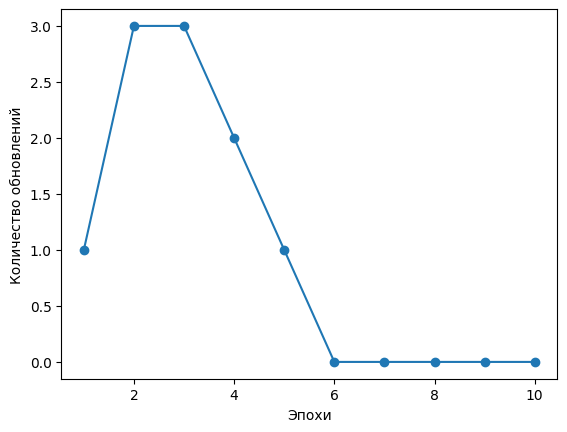

In [ ]:
ppn = Perceptron(eta = 0.1, n_iter = 10)
ppn.fit(X,y)
plt.plot(range(1,len(ppn.errors_)+1),ppn.errors_,marker = 'o')
plt.xlabel('Эпохи')
plt.ylabel('Количество обновлений')
plt.show()
# Похоже что-то не так...

In [ ]:
# Задача со звездочкой - прокоментируй этот код качественно
from matplotlib.colors import ListedColormap
def plot_decision_regions(X,y,classifier, resolution = 0.2):
  markers = ('s','x','o','^','v')
  colors = ('red','blue','lightgreen','gray','cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])
  x1_min , x1_max = X[:,0].min()-1, X[:,0].max() + 1
  x2_min , x2_max = X[:,1].min()-1, X[:,1].max() + 1
  xx1,xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),
                        np.arange(x2_min,x2_max,resolution))
  Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
  Z = Z.reshape(xx1.shape)
  plt.contourf(xx1,xx2,Z,alpha=0.3,cmap=cmap)
  plt.xlim(xx1.min(),xx1.max())
  plt.ylim(xx2.min(),xx2.max())
  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y==cl,0],
                y=X[y==cl,1],
                alpha=0.8,
                c=colors[idx],
                marker=markers[idx],
                label=cl,
                edgecolor='black')

<ipython-input-8-5828970096a9>:17: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y==cl,0],


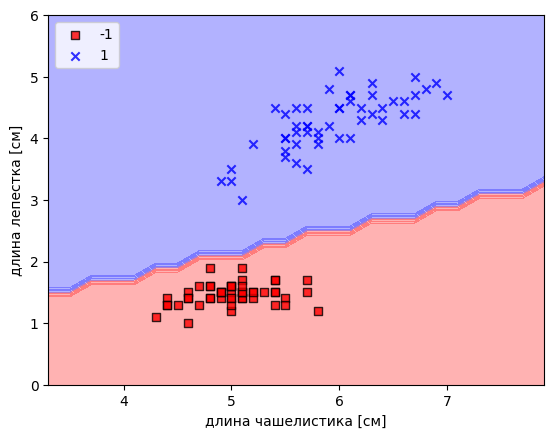

In [ ]:
# Из-за ошибки в коде персептрона эта штука не работет
plot_decision_regions(X,y, classifier=ppn)
plt.xlabel('длина чашелистика [см]')
plt.ylabel('длина лепестка [см]')
plt.legend(loc='upper left')
plt.show()

Задание : Средствами numpy создать два случайных линейносепарабельных множества с нормальным распределением. Обучить персептрон. Подобрать максимальные значения стандартного отклонения при которых персептрон сможет разделять множества.
Пример:


---
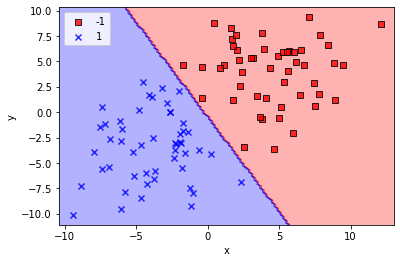
_______



[[10.7436518   8.45528714]
 [10.40823654  8.62245077]
 [10.42077424  8.54034916]
 [10.33905471  8.55935785]
 [10.62981114  8.39050882]
 [10.1547692   8.51693824]
 [10.76172176  8.57405565]
 [10.38581896  8.40462994]
 [10.54785586  8.47337815]
 [10.46259444  8.50326145]
 [10.71931619  8.36268827]
 [10.19097889  8.53151594]
 [10.45163742  8.58461606]
 [10.44239185  8.41404841]
 [10.67006542  8.5350546 ]
 [10.33501631  8.36877166]
 [10.47413577  8.49613045]
 [10.36832124  8.33842276]
 [10.50633206  8.61214177]
 [10.58742228  8.54089005]
 [10.33490712  8.4975383 ]
 [10.67170856  8.42248384]
 [10.63523861  8.62737559]
 [10.57537415  8.69671017]
 [10.63512839  8.31420181]
 [10.39744082  8.6236164 ]
 [10.48156647  8.66276508]
 [10.35963458  8.53380117]
 [10.45981679  8.3800732 ]
 [10.57955332  8.58633453]
 [10.39625089  8.48190797]
 [10.44048697  8.43960794]
 [10.39692409  8.37699419]
 [10.37321915  8.55505375]
 [10.39931308  8.57928069]
 [10.49810031  8.43764693]
 [10.33240345  8.55205763]
 

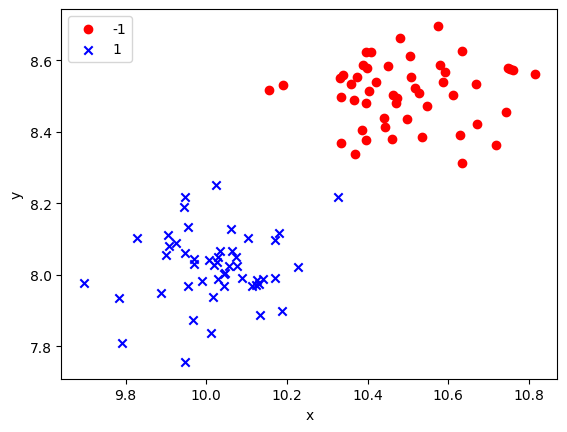

In [ ]:
import pandas as pd
size = 100
state = np.random.RandomState(1)
norm1 = state.normal(loc=10, scale=0.15, size=size)
norm2 = state.normal(loc=8, scale=0.1,size=size)

norm1[:50] += 0.5
norm2[:50] += 0.5

df = pd.DataFrame({'norm1':norm1, 'norm2':norm2})
X = df.iloc[0:100,[0,1]].values
print(X)


y1 = [-1 for i in range(size//2)]
y2 = [1 for i in range(size//2)]
y = y1 + y2
print(len(y))

plt.scatter(norm1[:50],norm2[:50],
            color = 'red', marker = 'o', label = '-1')
plt.scatter(norm1[50:100],norm2[50:100],
            color = 'blue', marker = 'x', label = '1')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='upper left')
plt.show()

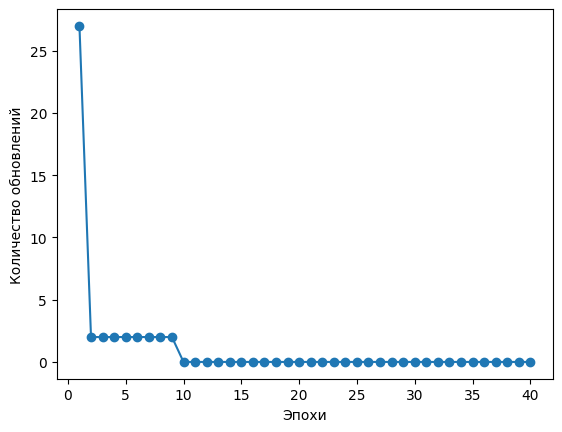

In [ ]:
ppn = Perceptron(eta = 0.00001, n_iter = 40)
ppn.fit(X,y)
plt.plot(range(1,len(ppn.errors_)+1),ppn.errors_,marker = 'o')
plt.xlabel('Эпохи')
plt.ylabel('Количество обновлений')
plt.show()

<ipython-input-8-5828970096a9>:17: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y==cl,0],


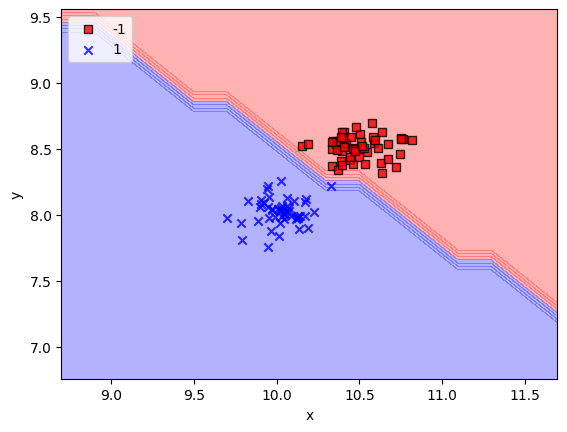

In [ ]:
plot_decision_regions(X,y, classifier=ppn)
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='upper left')
plt.show()

ссылки на блакноты размещать в таблице напроив своей фамилии

https://docs.google.com/spreadsheets/d/1bBhCuJiAeAm27T3ylE58aI83nWWD1AijkbYHQrs4ohA/edit?usp=sharing
